In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [4]:
testPin_file = "../Data/testPin.csv"

testPin = read_pin(testPin_file)

In [5]:
filename = "../Data/rssi5.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [6]:
data[scanners] = min_max_scaling(data[scanners])

In [7]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,3219.000000,3140.000000,2388.000000,3396.000000,3168.000000,3347.000000,3461.000000,3819.000000,4928.000000,2340.000000,3180.000000,3074.000000,3378.000000,3859.000000,3303.000000,2179.000000,3539.000000
mean,0.438490,0.402463,0.354355,0.426232,0.437463,0.425197,0.421501,0.427935,0.419207,0.368105,0.387825,0.468933,0.499724,0.372234,0.420169,0.296665,0.402562
std,0.151902,0.130322,0.120450,0.142455,0.114273,0.156658,0.155481,0.146579,0.196955,0.179789,0.184707,0.130727,0.130346,0.153890,0.143028,0.135034,0.135141
min,0.050000,0.033333,0.050000,0.033333,0.050000,0.033333,0.050000,0.050000,0.033333,0.033333,0.033333,0.066667,0.066667,0.033333,0.033333,0.033333,0.033333
25%,0.333333,0.300000,0.266667,0.329167,0.366667,0.300000,0.283333,0.300000,0.283333,0.216667,0.216667,0.383333,0.416667,0.216667,0.316667,0.183333,0.300000
50%,0.466667,0.416667,0.350000,0.416667,0.450000,0.450000,0.416667,0.450000,0.416667,0.333333,0.400000,0.466667,0.500000,0.416667,0.416667,0.283333,0.416667
75%,0.533333,0.516667,0.450000,0.550000,0.533333,0.550000,0.550000,0.550000,0.516667,0.533333,0.550000,0.550000,0.600000,0.516667,0.516667,0.416667,0.516667
max,0.733333,0.616667,0.600000,0.700000,0.683333,0.750000,0.783333,0.650000,0.850000,0.700000,0.800000,0.750000,0.766667,0.633333,0.733333,0.566667,0.666667


In [8]:
data

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.466667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350000,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,2019-12-12 01:47:54.481,V1_26,0.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49659,2019-12-12 01:47:54.683,V1_26,NaN,NaN,NaN,0.383333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49660,2019-12-12 01:47:54.736,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49661,2019-12-12 01:47:54.772,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266667,NaN,NaN,NaN,NaN


In [9]:
testFilename = "../Data/testRssi.csv"
B1 = "0117C55D14E4"

test = read_data(testFilename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [10]:
test

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-13 02:15:14.272,T1_1,NaN,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-13 02:15:14.362,T1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-13 02:15:14.368,T1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN
3,2019-12-13 02:15:14.392,T1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-13 02:15:14.439,T1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-66.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8453,2019-12-13 03:20:19.283,T1_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,NaN,NaN
8454,2019-12-13 03:20:19.287,T1_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
8455,2019-12-13 03:20:19.383,T1_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-70.0,NaN,NaN,NaN
8456,2019-12-13 03:20:19.402,T1_16,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test[scanners] = min_max_scaling(test[scanners])

In [12]:
test.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,532.000000,599.000000,480.000000,575.000000,547.000000,586.000000,614.000000,585.000000,652.000000,349.000000,651.000000,581.000000,605.000000,642.000000,605.000000,433.000000,511.000000
mean,0.453039,0.373011,0.375104,0.381507,0.453230,0.476877,0.431162,0.424957,0.336554,0.355014,0.383948,0.437235,0.460331,0.382061,0.347824,0.283834,0.386595
std,0.171712,0.122397,0.117876,0.119178,0.130953,0.171551,0.133564,0.155576,0.142083,0.163073,0.149436,0.144454,0.130634,0.185832,0.140548,0.116779,0.111174
min,0.100000,0.066667,0.066667,0.033333,0.050000,0.050000,0.033333,0.033333,0.050000,0.050000,0.050000,0.116667,0.066667,0.033333,0.033333,0.066667,0.050000
25%,0.300000,0.283333,0.300000,0.300000,0.383333,0.333333,0.333333,0.300000,0.216667,0.216667,0.266667,0.333333,0.383333,0.200000,0.216667,0.183333,0.316667
50%,0.466667,0.383333,0.383333,0.400000,0.433333,0.466667,0.483333,0.450000,0.316667,0.383333,0.416667,0.416667,0.466667,0.416667,0.383333,0.283333,0.400000
75%,0.566667,0.466667,0.466667,0.466667,0.583333,0.583333,0.550000,0.566667,0.466667,0.483333,0.516667,0.516667,0.533333,0.566667,0.450000,0.350000,0.483333
max,0.750000,0.616667,0.600000,0.633333,0.683333,0.816667,0.633333,0.633333,0.566667,0.633333,0.583333,0.750000,0.733333,0.616667,0.600000,0.516667,0.666667


## Train Validation Split

In [13]:
train, validation = train_validation_split(data)

In [14]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_10,281,151,102,258,232,95,98,339,0,213,123,161,257,382,193,4,284
V1_11,62,84,102,125,149,104,83,122,153,62,72,174,161,43,52,27,107
V1_12,91,100,71,123,104,105,72,72,207,63,91,199,156,107,139,75,89
V1_13,88,176,65,146,57,115,136,146,324,18,53,144,117,128,190,20,80
V1_14,43,200,63,107,77,117,342,84,266,19,137,63,104,127,224,91,116
V1_18,81,30,61,113,59,45,35,292,3,93,49,75,71,298,36,0,209
V1_19,381,123,114,195,316,107,75,403,51,178,62,185,332,390,142,117,281
V1_20,139,140,124,102,152,112,85,104,108,46,84,116,223,19,110,28,93
V1_21,88,183,100,98,126,118,162,68,187,28,120,122,110,80,119,89,82


In [15]:
train.shape

(39730, 19)

In [16]:
validation.shape

(9933, 19)

In [17]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [18]:
train_rolled = train.groupby("location").rolling(30, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(30, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [19]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30176,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.583333,NaN,NaN,NaN,0.450000
4,V1_10,30177,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.575000,NaN,NaN,NaN,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39725,V1_9,43166,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.622222,NaN,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.133333,0.416667
39726,V1_9,43167,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.622222,NaN,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.125000,0.416667
39727,V1_9,43168,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.622222,NaN,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667
39728,V1_9,43169,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.620833,NaN,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667


## Imputation
1. Forward fill
2. Fill NaN

In [20]:
train_imputed = train_rolled.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

In [21]:
validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

In [22]:
test_imputed = test_rolled.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

## Change Location to Coordinates

In [23]:
train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

In [24]:
validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

In [25]:
test_imputed["X"] = test_imputed["location"].apply(lambda x: testPin[x]["X"])
test_imputed["Y"] = test_imputed["location"].apply(lambda x: testPin[x]["Y"])

## Model Training

In [26]:
X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

In [27]:
model = MLPRegressor(model_type='special')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, X_test, y_test)

Train on 39730 samples, validate on 8458 samples
Epoch 1/1000
39730/39730 [==============================] - 3s 66us/sample - loss: 11.8278 - mae: 1.9184 - mse: 11.1997 - val_loss: 4.1009 - val_mae: 1.4517 - val_mse: 3.4393
Epoch 2/1000
39730/39730 [==============================] - 2s 63us/sample - loss: 1.9982 - mae: 0.8710 - mse: 1.3679 - val_loss: 4.0291 - val_mae: 1.4118 - val_mse: 3.3395
Epoch 3/1000
39730/39730 [==============================] - 2s 41us/sample - loss: 1.6775 - mae: 0.7552 - mse: 1.0556 - val_loss: 3.6234 - val_mae: 1.3783 - val_mse: 2.9883
Epoch 4/1000
39730/39730 [==============================] - 1s 34us/sample - loss: 1.4688 - mae: 0.6745 - mse: 0.8528 - val_loss: 3.3671 - val_mae: 1.3001 - val_mse: 2.7321
Epoch 5/1000
39730/39730 [==============================] - 2s 41us/sample - loss: 1.3565 - mae: 0.6296 - mse: 0.7488 - val_loss: 3.4468 - val_mae: 1.2902 - val_mse: 2.7986
Epoch 6/1000
39730/39730 [==============================] - 2s 41us/sample - loss: 1

Epoch 48/1000
39730/39730 [==============================] - 1s 30us/sample - loss: 0.7432 - mae: 0.3094 - mse: 0.2103 - val_loss: 2.9638 - val_mae: 1.1932 - val_mse: 2.4317
Epoch 49/1000
39730/39730 [==============================] - 1s 30us/sample - loss: 0.7401 - mae: 0.3079 - mse: 0.2078 - val_loss: 3.2592 - val_mae: 1.2651 - val_mse: 2.7385
Epoch 50/1000
39730/39730 [==============================] - 1s 31us/sample - loss: 0.7393 - mae: 0.3072 - mse: 0.2073 - val_loss: 2.9733 - val_mae: 1.1889 - val_mse: 2.4455
Epoch 51/1000
39730/39730 [==============================] - 1s 30us/sample - loss: 0.7363 - mae: 0.3045 - mse: 0.2047 - val_loss: 2.8155 - val_mae: 1.1511 - val_mse: 2.2655
Epoch 52/1000
39730/39730 [==============================] - 1s 30us/sample - loss: 0.7327 - mae: 0.3027 - mse: 0.2015 - val_loss: 2.8713 - val_mae: 1.1608 - val_mse: 2.3307
Epoch 53/1000
39730/39730 [==============================] - 1s 32us/sample - loss: 0.7330 - mae: 0.3034 - mse: 0.2020 - val_loss:

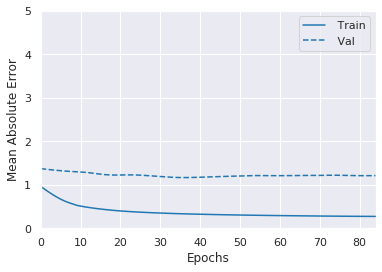

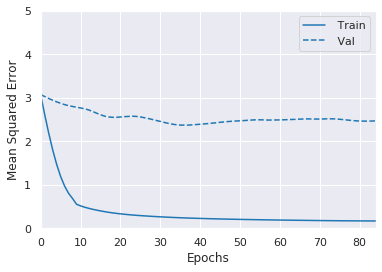

In [29]:
model.show_history()

## Model Validation

9933/1 - 0s - loss: 0.7347 - mae: 0.4970 - mse: 0.7147
Validation loss: 1.219560077369099
Mean absolute error: 0.49703953
Mean squared error: 0.7147493
Average distance error: 0.8026232727705022


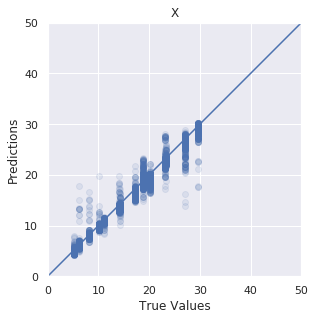

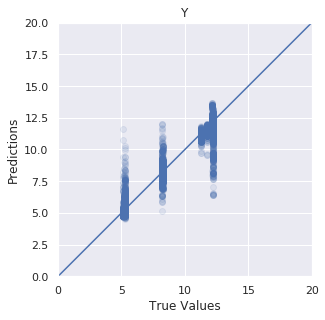

In [30]:
model.model_validation(X_validation, y_validation)

## Model Testing

8458/1 - 0s - loss: 3.7049 - mae: 1.2406 - mse: 2.5843
Test loss: 3.0944380035183903
Mean absolute error: 1.2406455
Mean squared error: 2.5842574
Average distance error: 1.9870996184798864


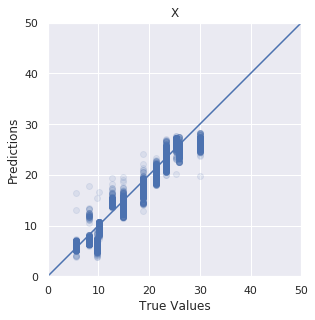

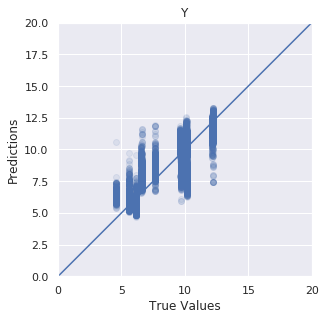

In [31]:
model.model_testing(X_test, y_test)

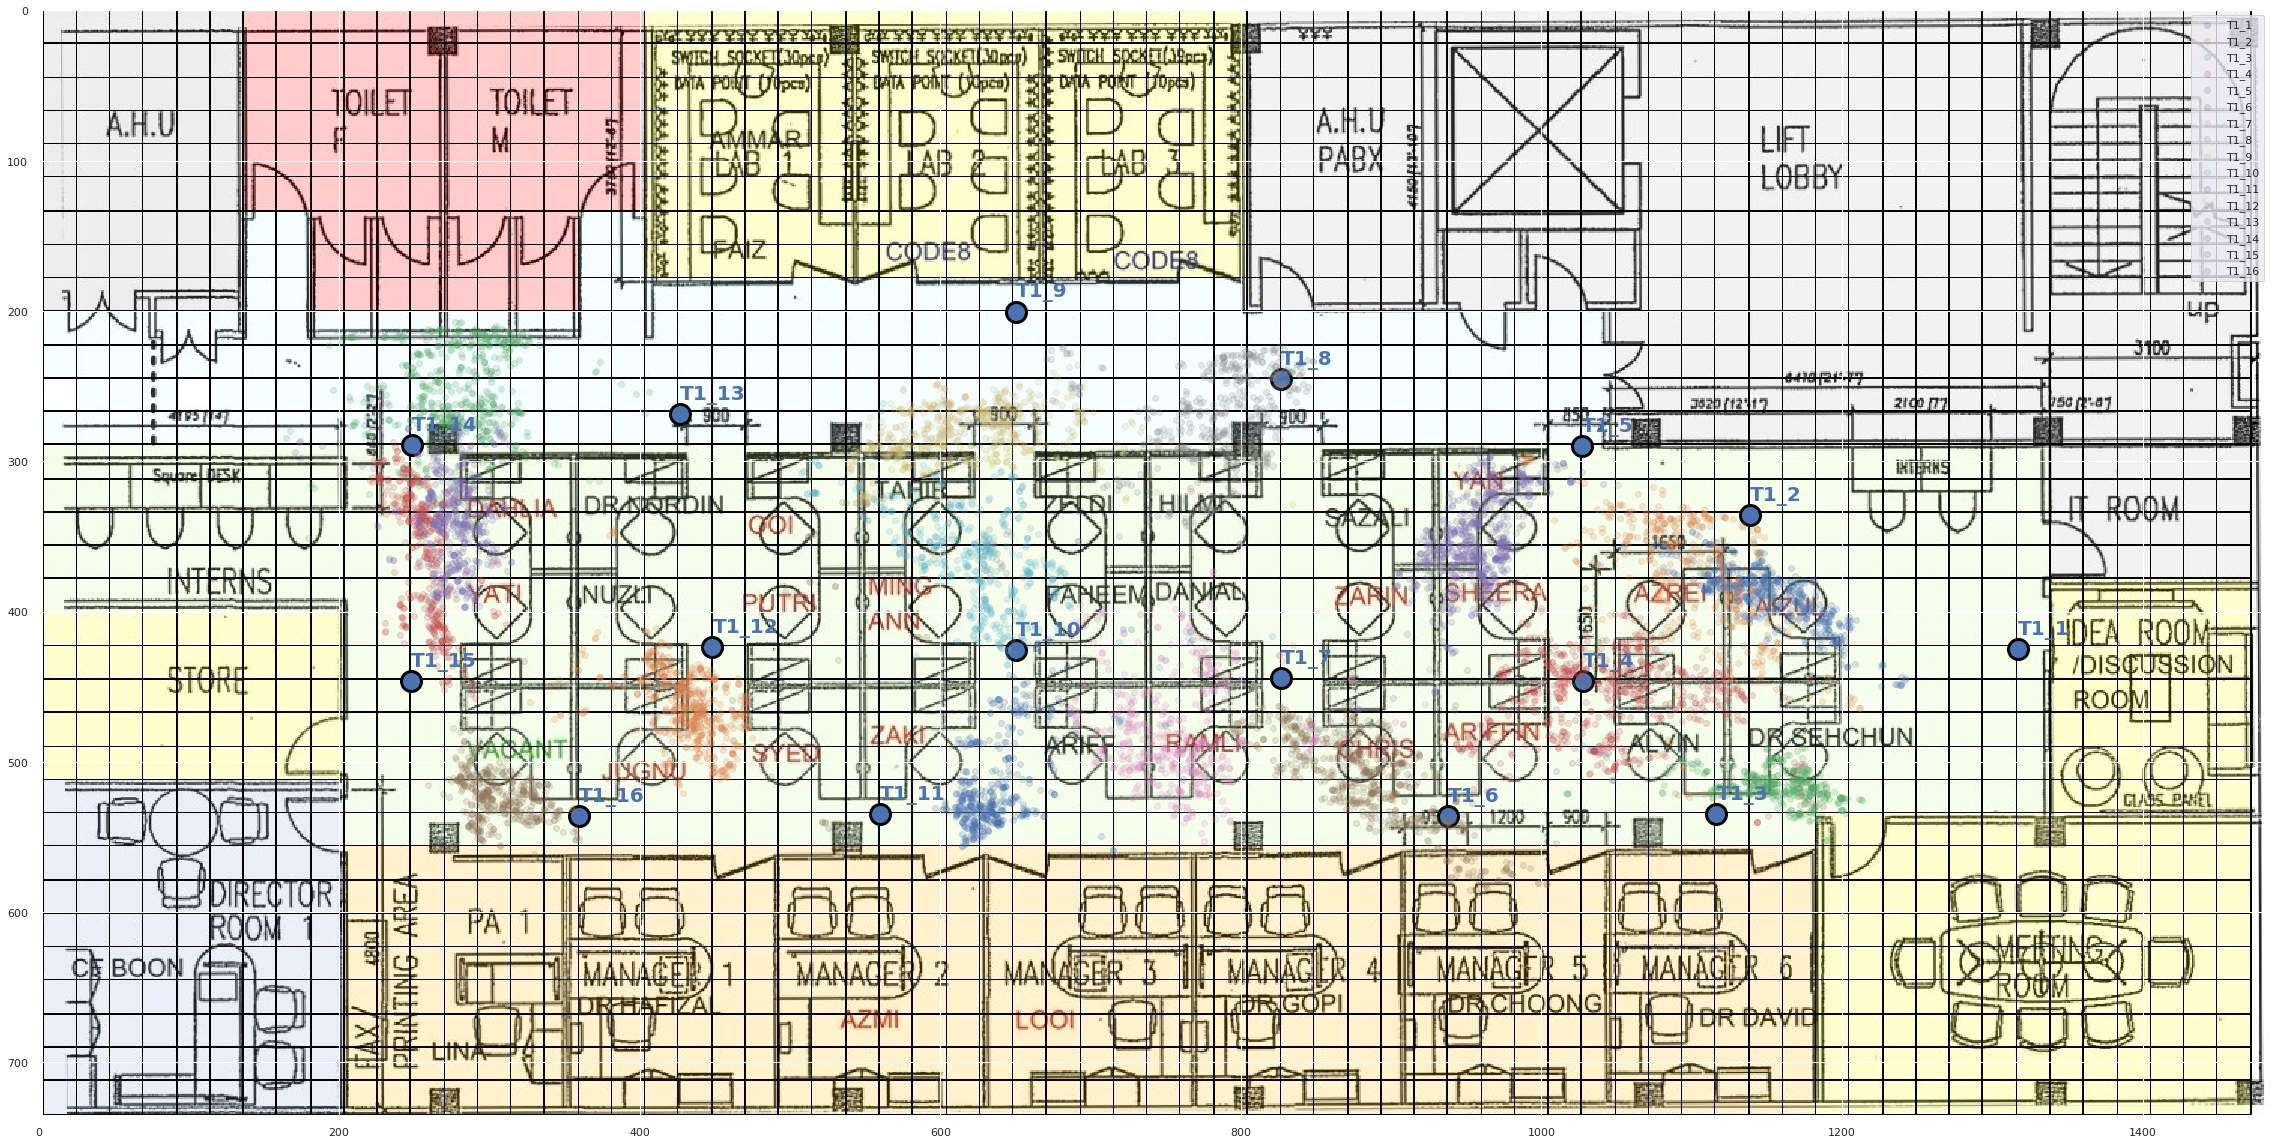

In [32]:
img =  mpimg.imread('../Map/main.png')
fingerprint_color = "r"
testdata_color = "b"
plt.figure(figsize=(40,40))
plt.imshow(img)

labels = ["V1_23", "V1_24", "V1_32", "V1_22", "V1_14", "V1_13", "V1_12", "V1_21", "V1_29", "V1_30", "V1_31", "V1_11", "V1_20", "V1_28", "V1_10", "V1_19", "V1_27", "V1_9", "V1_8", "V1_18", "V1_26"]
x = [27.151600, 29.594400, 29.689400, 23.153700, 23.169100, 20.171700, 17.173201, 18.712299, 18.691700, 23.244200, 27.133301, 14.063600, 14.159800, 14.250300, 11.176600, 10.162500, 10.141900, 8.178670, 5.180690, 6.164600, 6.255650]
y = [8.159480, 8.172020, 11.286000, 8.250140, 5.247920, 5.121330, 5.217130, 8.227330, 12.230300, 12.253700, 11.717700, 5.312350, 8.203950, 12.207500, 5.297530, 8.183420, 12.186400, 5.282130, 5.266730, 8.274090, 12.166400]
x = np.array(x) * 44
y = np.array(y) * 44

testLabels = ["T1_1", "T1_2", "T1_3", "T1_4", "T1_5", "T1_6", "T1_7", "T1_8", "T1_9", "T1_10", "T1_11", "T1_12", "T1_13", "T1_14", "T1_15", "T1_16"]
testX = [29.934250, 25.877805, 25.372470, 23.355726, 23.333564, 21.316819, 18.790348, 18.790348, 14.779021, 14.779021, 12.717952, 10.191480, 9.703916, 5.648265, 5.626103, 8.174736]
testY = [9.659024, 7.630801, 12.155781, 10.139037, 6.593112, 12.177943, 10.094712, 5.573659, 4.554205, 9.673634, 12.155781, 9.629310, 6.105547, 6.570950, 10.139037, 12.177943]
testX = np.array(testX) * 44
testY = np.array(testY) * 44

# plt.scatter(x, y, s=400, c=fingerprint_color, edgecolors="black", linewidths=3)
plt.scatter(testX, testY, s=400, c=testdata_color, edgecolors="black", linewidths=3)

# for i in range(len(labels)):
#     plt.annotate(labels[i], (x[i], y[i] - 10), fontsize=20, color=fingerprint_color, weight='bold')

for j in range(len(testLabels)):
    plt.annotate(testLabels[j], (testX[j], testY[j] - 10), fontsize=20, color=testdata_color, weight='bold')

for i in range(len(testLabels)):
    loc = testLabels[i]
    test_loc = test_imputed[test_imputed['location'] == loc]
    X_loc = test_loc[scanners].values
    locs = model.predict(X_loc) * 44
    plt.scatter(locs[:, 0], locs[:, 1], alpha=0.2, label=testLabels[i])
plt.legend()